<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
<div hidden>
    $$
    \newcommand{\reals}{\mathbb{R}}
    \newcommand{\naturals}{\mathbb{N}}
    \newcommand{\integers}{\mathbb{Z}}
    \newcommand{\prob}{\mathbb{P}}
    \newcommand{\expect}{\mathbb{E}}
    \newcommand{\b}[1]{\mathbf{#1}}
    \newcommand{\bs}[1]{\boldsymbol{#1}}
    \newcommand{\c}[1]{\mathcal{#1}}
    \newcommand{mat}[2]{\left[\,\begin{array}{#1}#2\end{array}\,\right]}
    $$
</div>

# COMPSCI 371 Homework 7

_**Group Members:**_ Gordon Liang, Phillip Sievers, Jose Pablo Rivera

### Problem 0 (3 points)

## Part 1: The Gini Index 

### Problem 1.1 (Exam Style)

$$\begin{align} 
p^* &= \begin{pmatrix} 1 \\ 0 \\ .. \\ 0 \end{pmatrix} \\
d_{max}^2 &= |p^* - c|^2 \\
&= \left\lVert \begin{pmatrix} 1 \\ 0 \\ .. \\ 0 \end{pmatrix} - \frac{1}{K}\begin{pmatrix} 1 \\ 1 \\ .. \\ 1 \end{pmatrix} \right\rVert ^2 \\

&= (1-\frac{1}{K})^2+(K-1)(-\frac{1}{K})^2 \\
&=1-\frac{2}{K}+\frac{1}{K^2}+\frac{K}{K^2}-\frac{1}{K^2} \\
&=1-\frac{1}{K}
\end{align}
$$

### Problem 1.2 (Exam Style)

$$
\begin{align}
p&=\begin{pmatrix} p_1 \\ p_2 \\ ... \\ p_K \end{pmatrix} \\
d^2(p,c)
&=|p-c|^2 \\
&=\left\lVert \begin{pmatrix} p_1 \\ p_2 \\ ... \\ p_K \end{pmatrix}-\frac{1}{K}\begin{pmatrix} 1 \\ 1 \\ .. \\ 1 \end{pmatrix} \right\rVert ^2 \\
&= \sum_{k=1}^K (p_k-\frac{1}{K})^2 \\
&= \sum_{k=1}^K p_k^2 - \sum_{k=1}^K2\frac{p_k}{K}+\sum_{k=1}^K \frac{1}{K^2} \\
&= \sum_{k=1}^K p_k^2 - 2\frac{1}{K} + \frac{1}{K} \\
&= \sum_{k=1}^K p_k^2 - \frac{1}{K} \\
\end{align}
$$

### Problem 1.3 (Exam Style)

$$
\begin{align}
d_{max}^2-d^2(p,c) 
&=1-\frac{1}{K} - (\sum_{k=1}^K p_k^2 - \frac{1}{K}) \\
&=1-\sum_{k=1}^K p_k^2 \\
&=i_{Gini}(p)
\end{align}
$$

## Part 2: Basics of Decision Tree Classifiers

### Problem 2.1 (Exam Style)

e

1

0.3

0

0.320

0.2

### Problem 2.2 (Exam Style)

In [550]:
import numpy as np
import matplotlib.pyplot as plt

In [551]:
class Node:
    def __init__(self, j, t):
        self.j = j
        self.t = t
        self.l = None
        self.r = None
        self.lp = None
        self.rp = None

a = Node(1,6)
b = Node(2,3)
c = Node(2,1)
d = Node(1,4)
e = Node(2,7)

a.l = b
b.l = c
b.r = d
a.r = e

c.lp = (0.3,0.4,0.3)
c.rp = (0.2,0.2,0.6)

d.lp = (0.0,0.2,0.8)
d.rp = (0.6,0.1,0.3)

e.lp = (0.1,0.5,0.4)
e.rp = (0.8,0.1,0.1)

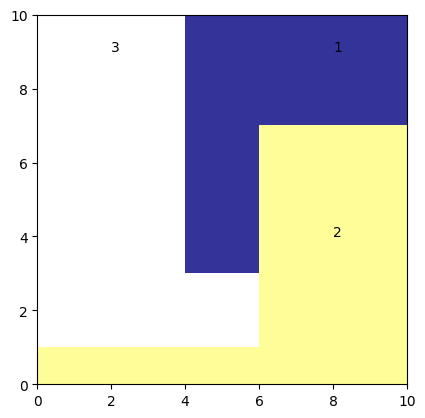

In [552]:
def h(n, x):
    if not n.l and not n.r:
        if x[n.j - 1] <= n.t:
            return np.argmax(n.lp) + 1
        return np.argmax(n.rp) + 1
    if x[n.j - 1] <= n.t: 
        return h(n.l, x)
    else: 
        return h(n.r, x)

xx = np.arange(0,11)
yy = np.arange(0,11)
arr = [[h(a, (x,y)) for x in xx] for y in yy]

img = plt.imshow(
    arr, 
    cmap='terrain', 
    origin='lower',
    extent=[-1, 10, -1, 10],
    interpolation='nearest'
)

plt.text(2,9,3)
plt.text(8,9,1)
plt.text(8,4,2)

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

### Problem 2.3 (Exam Style)

$
i(S) = 3/5
$

$j$|$t$|$\|L\|$|$i_L$|$\|R\|$|$i_R$|$\delta$|best
-|-|-|-|-|-|-|-
1|3|2|0|3|1/3|2/5|yes
1|5|3|1/3|2|1/2|1/5|no
1|7|4|1/2|1|0|1/5|no
2|2|1|0|4|1/2|1/5|yes
2|4|2|1/2|3|1/3|1/5|yes
2|6|3|2/3|2|1/2|0|no

## Part 3: Regression Trees

In [553]:
import pickle
import numpy as np
from types import SimpleNamespace
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Rectangle
from matplotlib import use
from matplotlib import colors, colormaps
plt.style.use('default')
%matplotlib inline

In [554]:
def bounding_box(xs, margin=0.05):
    mn, mx = np.min(xs, axis=0) - margin, np.max(xs, axis=0) + margin
    return SimpleNamespace(left=mn[0], right=mx[0], bottom=mn[1], top=mx[1])

In [555]:
def replace_side(box, side, value):
    new = dict(**box.__dict__)
    new[side] = value
    return SimpleNamespace(**new)

In [556]:
def shade_box(box, color):
    corner = box.left, box.bottom
    width, height = box.right - corner[0], box.top - corner[1]
    rectangle = Rectangle(corner, width, height,
                          edgecolor='none', facecolor=color)
    plt.gca().add_patch(rectangle)

In [557]:
def make_colormap(data):
    value_range = [np.minimum(0, np.min(data.y)), np.maximum(0, np.max(data.y))]
    half_range = max(-value_range[0], value_range[1])
    return SimpleNamespace(
        map=colormaps['RdYlBu'],
        norm=colors.CenteredNorm(vcenter=0, halfrange=half_range)
    )

In [558]:
def value_color(value, color_scheme):
    return np.squeeze(color_scheme.map(color_scheme.norm(value)))

In [559]:
def make_figure(box=None, fig_size=(6, 6)):
    if box is None:
        box = SimpleNamespace(left=0, right=1, bottom=0, top=1)
    plt.figure(figsize=fig_size, tight_layout=True)
    plt.plot((box.left, box.right, box.right, box.left, box.left),
             (box.bottom, box.bottom, box.top, box.top, box.bottom),
             lw=0.5, c='gray')
    plt.axis('square')
    plt.axis('off')
    return box

In [560]:
import urllib.request
import ssl
from os import path as osp
import shutil

# same as zsh 
# curl https://www2.cs.duke.edu/courses/fall25/compsci371/homework/7/regressor_data.pkl \
#      --output regressor_data.pkl
def retrieve(file_name, semester='fall25', homework=7):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [561]:
regression_training_set_name = 'regressor_data.pkl'
retrieve(regression_training_set_name)

Using previously downloaded file regressor_data.pkl


In [562]:
with open(regression_training_set_name, 'rb') as file:
    regression_training_set = pickle.load(file)

In [563]:
color_map = make_colormap(regression_training_set)

In [564]:
regression_training_set
X = regression_training_set.x
y = regression_training_set.y

In [565]:
color_map = make_colormap(regression_training_set)

In [566]:
def plot_data(data, color_scheme):
    plt.scatter(
        data.x[:, 0], data.x[:, 1], s=10,
        c=data.y, cmap=color_scheme.map, norm=color_scheme.norm
    )
    plt.colorbar(cmap=color_scheme.map, norm=color_scheme.norm, shrink=0.855)

In [567]:
import sklearn
h = sklearn.tree.DecisionTreeRegressor()
h.fit(X,y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


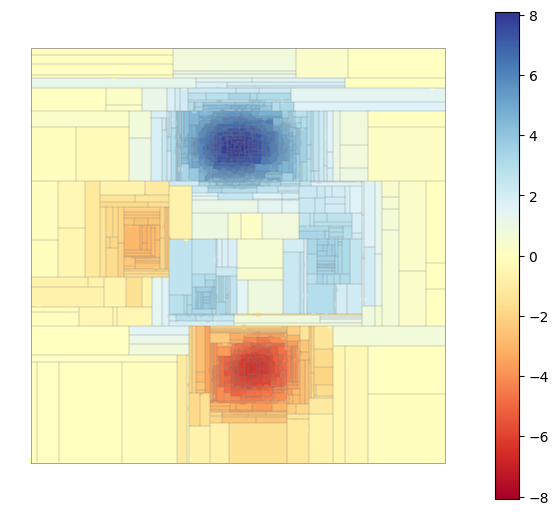

In [568]:
def draw_tree(t, b, color_scheme):
    def draw(node, box):
        if  t.children_left[node] == -1 \
        and t.children_right[node] == -1:
            shade_box(box, value_color(t.value[node], color_scheme))
            return
        plt.plot([(t.threshold[node], t.threshold[node]),(box.left, box.right)][t.feature[node]],
                 [(box.bottom, box.top),(t.threshold[node], t.threshold[node])][t.feature[node]],
                    lw = 0.25, c='gray')
        draw(t.children_left[node], replace_side(box,['right','top'][t.feature[node]],t.threshold[node]))
        draw(t.children_right[node], replace_side(box,['left','bottom'][t.feature[node]],t.threshold[node]))

    draw(0, b)
    plot_data(regression_training_set, color_map)

data_box = make_figure()
draw_tree(h.tree_, data_box, color_map)

## Part 4: Random Decision Forests

In [569]:
spiral_file = 'spiral.pkl'
retrieve(spiral_file)
with open(spiral_file, 'rb') as file:
    spiral = pickle.load(file)

Using previously downloaded file spiral.pkl


In [570]:
tx = spiral.train.x
ty = spiral.train.y

sx = spiral.test.x
sy = spiral.test.y

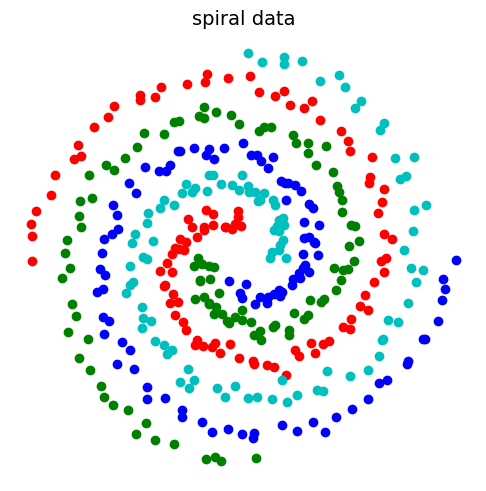

In [571]:
def draw_spiral(s):
    font_size = 14
    plt.figure(figsize=(5, 5), tight_layout=True)
    for m, color in enumerate(s.labels):
        select = s.train.y == m
        plt.scatter(s.train.x[select, 0],
                    s.train.x[select, 1],
                    c=color)
    plt.gca().set_aspect(1)
    plt.axis('off')
    plt.title('spiral data', fontsize=font_size)
    plt.draw()

draw_spiral(spiral)

In [572]:
from matplotlib.colors import ListedColormap

def coarse_regions(h, colors, step=0.01):
    xx, yy = np.meshgrid(np.arange(0, 1, step),
                         np.arange(0, 1, step))
    label = h.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    color_map = ListedColormap(colors)
    plt.contourf(xx, yy, label, cmap=color_map)

In [573]:
h = sklearn.tree.DecisionTreeClassifier()
h.fit(tx,ty)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Problem 4.1

accuracy for 5 trees
91.125 %
out of bag score for 5 trees
65.25 %
accuracy for 500 trees
96.45 %
out of bag score for 500 trees
90.25 %


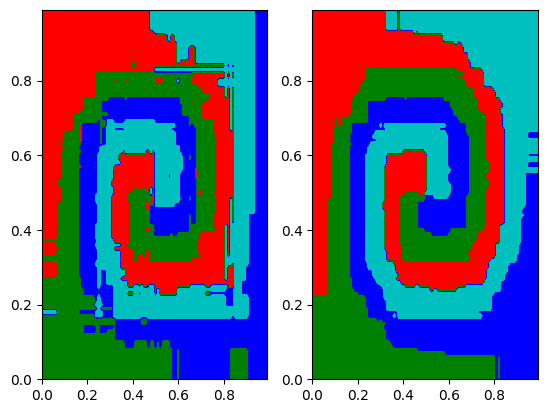

In [574]:
import warnings


def addplot(n_estimators, subplot):
    h = sklearn.ensemble.RandomForestClassifier(
        n_estimators = n_estimators,
        max_depth = None,
        min_samples_split = 2,
        random_state = 0,
        oob_score = True
    )
    h.fit(tx,ty)

    plt.subplot(1,2,subplot)
    coarse_regions(h, spiral.labels)

    print(f'accuracy for {n_estimators} trees')
    print(np.round(sklearn.metrics.accuracy_score(sy,h.predict(sx)) * 100,3),'%')
    print(f'out of bag score for {n_estimators} trees')
    print(np.round(h.oob_score_ * 100,3),'%')

    warnings.catch_warnings()
    warnings.simplefilter('ignore')

addplot(5,1)
addplot(500,2)
plt.show()

### Problem 4.2 (Exam Style)

1. Why is the OOB accuracy off when 5 trees are used? Be quantitative, and refer to the slides (not the notes) on trees and random forests for this part.

The number of trees used to validate each OOB data point follows a binomial distribution 

$$X\sim B(p=0.37,N=5)$$

As demonstrated in the calculations and distribution graph below, this means that the number of trees used to validate any given OOB data point is quite low.

For instance, $p(X=1)=0.291$ and $p(X=2)=0.342$. 

This reduces the number of "votes" per data point and biases the prediction to a few trees' $B_m$.

Furthermore, $p(X=0)=0.099$ just means there is a $9.9\%$ chance that $x$ is not in $T'$ at all.

This reduces the size of $T'$ and may further reduce how meaningful the OOB is.

2. How good is the OOB accuracy estimate with 500 trees? Compare it with the test accuracy.

OOB = $90.25\%$

test accuracy = $96.45\%$

OOB accuracy is a good but not great estimate. It is meaningfully ($6.20\%$) under test accuracy.

3. How do the two sets of decision regions (obtained with 5 and 500 trees) and the corresponding test accuracy values compare to each other, qualitatively?

- approximately equal spiral appearance of decision boundaries
- $M=5$ has rougher decision boundaries
- $M=500$ has smoother decision boundaries

- accuracy for $M=5$ is $91.125\%$
- accuracy for $M=500$ is $96.45\%$
- more trees is more accurate

- thus, smoother decision boundaries represent data better


Probability 0 trees vote on any given sample 0.099
Probability 1 trees vote on any given sample 0.291
Probability 2 trees vote on any given sample 0.342
Probability 3 trees vote on any given sample 0.201
Probability 4 trees vote on any given sample 0.059
Probability 5 trees vote on any given sample 0.007


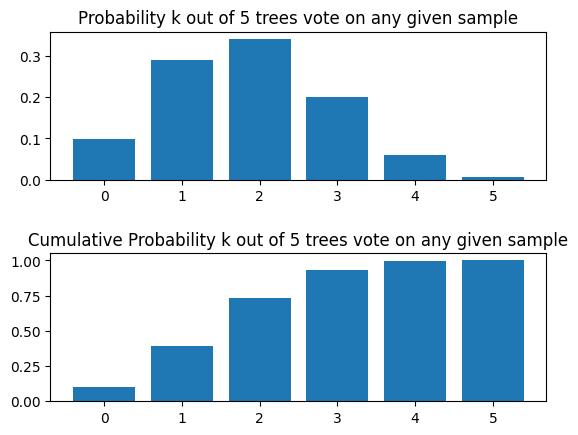

In [575]:
# 4.2.1

import math

cc = np.arange(6)
freq = [math.comb(5, c) * 0.37**c * 0.63**(5-c) for c in cc]
cdf = np.cumsum(freq)

for c in range(6):
    print(f'Probability {c} trees vote on any given sample', np.round(freq[c],3))

fig, ax = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.5)
ax[0].bar(cc, freq)
ax[0].set_title('Probability k out of 5 trees vote on any given sample')
ax[1].bar(cc, cdf)
ax[1].set_title('Cumulative Probability k out of 5 trees vote on any given sample')
plt.show()

## Part 5: Trees vs. Forests 

In [576]:
mnist_file_name = 'full_mnist.pkl'
retrieve(mnist_file_name)

Using previously downloaded file full_mnist.pkl


In [577]:
with open(mnist_file_name, 'rb') as file:
    digits = pickle.load(file)
tx = digits.train.x
ty = digits.train.y
sx = digits.test.x
sy = digits.test.y

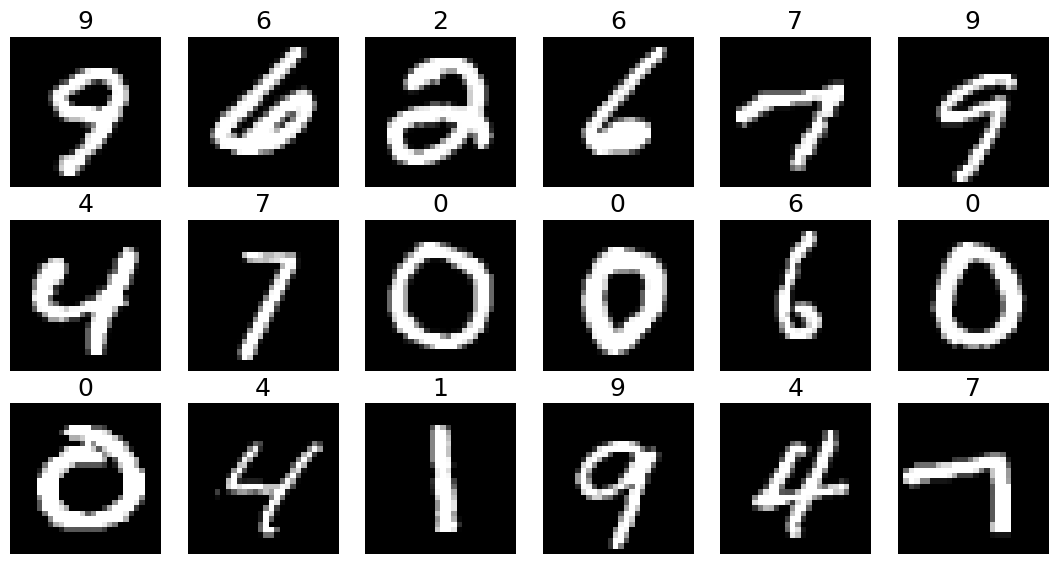

In [578]:
def x_to_image(x, stats):
    x = np.round(x * stats.std + stats.mean)
    x = np.clip(x * 255. / stats.max, 0., 255.).astype(np.uint8)
    return np.reshape(x, stats.shape)

def show_random_training_images(data, rows=3, columns=6):
    xs, ys = data.train.x, data.train.y
    rng = np.random.default_rng()
    indices = rng.integers(low=0, high=len(ys), size=rows * columns)
    plt.figure(figsize=(1.8 * columns, 1.9 * rows), tight_layout=True)
    for plot, index in enumerate(indices):
        image = x_to_image(xs[index], data.stats)
        plt.subplot(rows, columns, plot + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(ys[index], fontsize=18)
    plt.show()
show_random_training_images(digits)

### Problem 5.1

In [579]:
def display_stats(h):
    print(f'train error rate: {np.round((1-h.score(tx,ty))*100,3)}%')
    print(f'test error rate: {np.round((1-h.score(sx,sy))*100,3)}%')

    confusion_matrix = sklearn.metrics.confusion_matrix(sy,h.predict(sx))
    print('Confusion Matrix')
    print(confusion_matrix)

    fig, ax = plt.subplots()
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.set_title('Confusion Matrix on MNIST data')
    ax.imshow(confusion_matrix, cmap='turbo')
    plt.show()

In [580]:
h = sklearn.tree.DecisionTreeClassifier()
h.fit(tx,ty)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


train error rate: 0.0%
test error rate: 12.43%
Confusion Matrix
[[ 916    0    9    7    5   11   10    4   10    8]
 [   0 1089    8    6    2    6    7    3   13    1]
 [  10   11  877   32   14   14   13   25   26   10]
 [   8    7   29  858    4   54    4    3   21   22]
 [   5    3   11    7  858   11   15    9   21   42]
 [  12    9    5   44    7  741   25    4   24   21]
 [  17    3   10    8   17   16  848    4   25   10]
 [   5   15   23   26    6    4    1  914    7   27]
 [   7    6   23   36   26   30   20   10  791   25]
 [  15    2    7   17   42    9    6   22   24  865]]


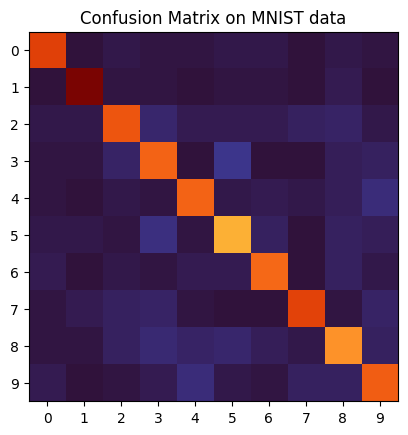

In [581]:
display_stats(h)

### Problem 5.2 (Exam Style)

1. Give an example of a pair of different digits that your confusion matrix indicates are often confused with each other. You need not display the digits.

5 is often mistaken as a 3

4 is often mistaken as a 9

2. Is the confusion always symmetric in the matrix? Symmetry here means that for any digit pair it is about equally likely to mistake the first digit for the second as it is to mistake the second for the first. No need to justify your answer.

no

3. Does the decision tree underfit? How can you tell, and what is the reason?

no. achieves $0.0\%$ error on training data. 

DecisionTreeClassifier with default parameters is a good model for this task, especially if it has seen the data.

4. Does the decision tree overfit? How can you tell, and what might be the reason?

yes. $12.33\%$ error on testing data is much greater than $0.0\%$ error on training data. 

DecisionTreeClassifier with default parameters is not as good for classifying new data.

### Problem 5.3

In [582]:
h = sklearn.ensemble.RandomForestClassifier(
    n_estimators = 100,
    oob_score = True
)

h.fit(tx,ty)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


train error rate: 0.0%
test error rate: 2.99%
Confusion Matrix
[[ 971    0    0    0    0    1    2    2    4    0]
 [   0 1123    3    3    0    2    2    0    1    1]
 [   6    0 1002    6    1    0    4    9    4    0]
 [   0    0    8  972    0   10    0    9    8    3]
 [   1    0    1    0  956    0    6    0    2   16]
 [   3    0    1   10    3  857    7    2    5    4]
 [   5    3    0    0    5    4  937    0    4    0]
 [   1    5   20    2    1    0    0  987    1   11]
 [   4    0    4    8    3    6    4    3  934    8]
 [   5    6    0   11   11    4    1    3    6  962]]


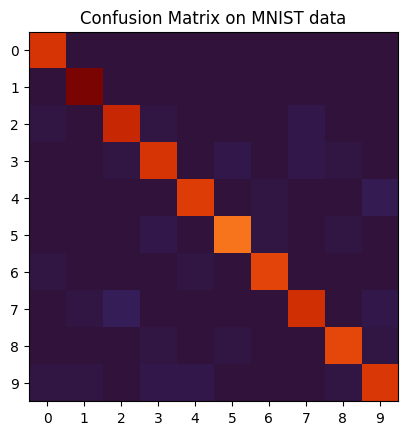

out of bag error rate: 3.452%


In [583]:
display_stats(h)
print(f'out of bag error rate: {np.round((1-h.oob_score_)*100,3)}%')

### Problem 5.4 (Exam Style)

1. Does the random forest underfit?

no

train error rate: 0.0%

test error rate: 2.99%

2. Does the random forest overfit more or less than the decision tree you found earlier for this dataset?

random forest overfits less than the decision tree

RF error rate $2.95\%$ < DT error rate $12.33\%$

3. Is the out-of-bag error rate a reasonably accurate estimate (say, within 1 or 2 percentage points) of the test error rate?

yes, OOB error rate is $3.468\%$, which is within a few percentage points from the test error rate $2.95\%$